# classification using tensorflow and keras


predicting digit from handwritten data

In [1]:
#MNIST--->Modified National Institutes of Standard and Technology dataset


In [2]:
import tensorflow as tf
import cv2
#cv2 is a package which allows us to use image data for ML

In [7]:
mnist=tf.keras.datasets.mnist
print(mnist)
#we will use keras datasets package--->collection for large no of datasets store dataset in a variable


<module 'keras.datasets.mnist' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\keras\\datasets\\mnist\\__init__.py'>


In [8]:
#load the dataset and perform train test split on it
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()# 80:20

In [11]:
#perform normalization on the data --->rescaling the data into values in the range 0,1 for all values
xtrain=tf.keras.utils.normalize(xtrain,axis=1)
xtest=tf.keras.utils.normalize(xtest,axis=1)

In [12]:
model=tf.keras.models.Sequential()#instatiating a sequential model
#it is used for plain stack of layers each layer has one input tensor and one outpu tensor
#here we are checking hand written numbers where there is a plain background and on it there is a layer of data so we use sequential model
#it is similar to model=tree.DecisionTreeClassifier() byt here it is in tensorflo package
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#these three lines related to neural networks nn-->neural networks
#tf.nn activation function used to compute weighted sum of inputs
#introducing non  linearity into the model 
#reason to use this-->enabling the model to learn more complicated patterns from the data provided 
#relu tries to laern and use 128 features/neurons from given data

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
#these three lines creates a layer where every input connected to every output in a certain weight 128 units/neurons
#data divided into neurons can keep more or low based on our wish

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(xtrain,ytrain,epochs=5)
#can keep any value for epochs but each epoch takes a certain amount of time
#fitting the data bit differnt to sklearn
#number of ties the training goes on on the training dataset to the model here we train the model for 5times to imporve accuracy

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0280
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0225
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9949 - loss: 0.0153
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9955 - loss: 0.0128


In [15]:
#in each iteration accuracy improves and loss reduces >95 very good model
#evaluation of the model based on test data
loss,accuracy=model.evaluate(xtest,ytest)
print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.1179
0.10915898531675339 0.9747999906539917


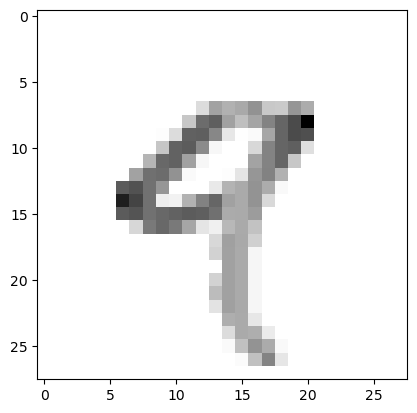

9


In [20]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[4],cmap=plt.cm.binary)
#cmap-->for colors
#to give grayscale image dark background light image or vice versa
plt.show()
print(ytrain[4])
#to see how training data looks like

In [22]:
#save the model for using in later purposes
#h5 extension must be used latest extension
model.save('Hand written data prediction.h5')

In [23]:
model.save('handwritten.keras')

In [24]:
#prediction
p=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
print(p)

[[4.4925943e-14 6.5777648e-12 4.6405080e-12 ... 9.9999785e-01
  1.1392135e-12 4.1902872e-08]
 [1.6103501e-15 1.8053193e-07 9.9999976e-01 ... 9.0491850e-15
  4.2167068e-11 1.2695415e-21]
 [1.7859351e-12 9.9999976e-01 1.9228677e-08 ... 1.9817543e-08
  4.7882157e-08 1.2561878e-13]
 ...
 [3.9290746e-15 1.0086389e-11 5.0591058e-13 ... 4.8155977e-09
  5.7467146e-11 4.8129482e-07]
 [1.1136230e-10 4.4532642e-14 9.1996257e-13 ... 7.6349600e-11
  3.5876399e-04 1.2395801e-12]
 [6.6774203e-14 3.2356464e-15 9.4380244e-16 ... 7.2849027e-18
  2.6971017e-12 8.4861101e-17]]


In [26]:
import numpy as np
#above output not understandable
print(np.argmax(p[0]))

7


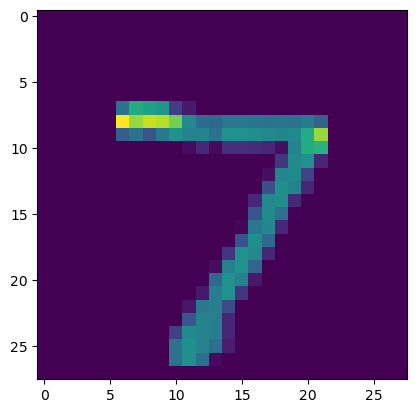

In [27]:
plt.imshow(xtest[0])
plt.show()